In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
ds=pd.read_csv('concrete_data.csv')

In [3]:
data=pd.DataFrame(data=ds)
data

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [4]:
data.shape

(1030, 9)

In [5]:
data.columns

Index(['Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer', 'CA', 'FA',
       'Age', 'CMS'],
      dtype='object')

In [6]:
data.describe()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


<AxesSubplot:>

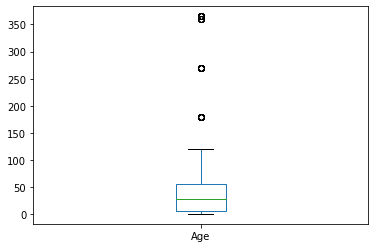

In [7]:
data['Age'].plot.box()

Cement                 AxesSubplot(0.125,0.536818;0.133621x0.343182)
Blast               AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Fly Ash              AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Water               AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Superplasticizer    AxesSubplot(0.766379,0.536818;0.133621x0.343182)
CA                        AxesSubplot(0.125,0.125;0.133621x0.343182)
FA                     AxesSubplot(0.285345,0.125;0.133621x0.343182)
Age                     AxesSubplot(0.44569,0.125;0.133621x0.343182)
CMS                    AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

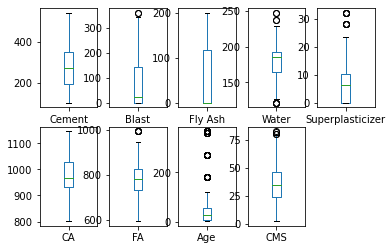

In [8]:
data.plot(kind='box',subplots=True,layout=(2,5))

<AxesSubplot:>

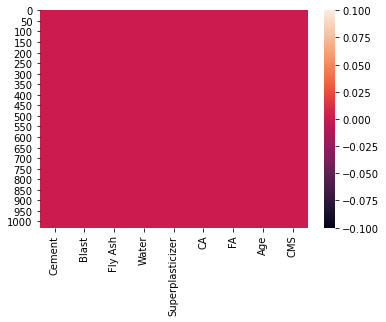

In [9]:
sns.heatmap(data.isnull())

<AxesSubplot:>

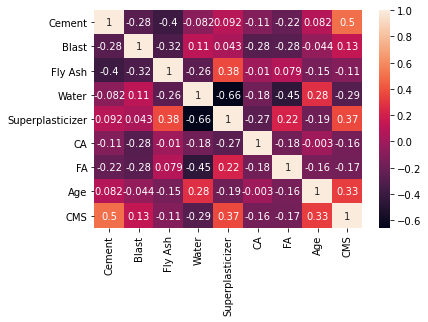

In [10]:
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:ylabel='Frequency'>

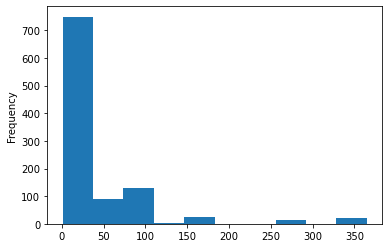

In [11]:
data['Age'].plot.hist()

In [12]:
data['Age']=np.log(data['Age'])

<AxesSubplot:ylabel='Frequency'>

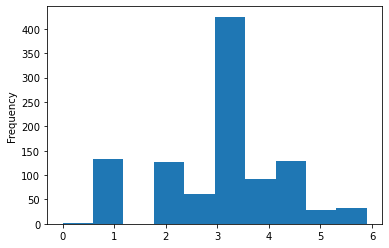

In [13]:
data['Age'].plot.hist()

In [40]:
data.skew()

Cement              0.509481
Blast               0.800717
Fly Ash             0.537354
Water               0.074628
Superplasticizer    0.907203
CA                 -0.040220
FA                 -0.253010
Age                -0.151351
CMS                 0.416977
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

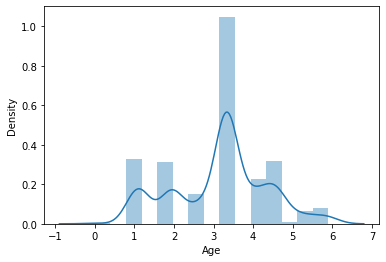

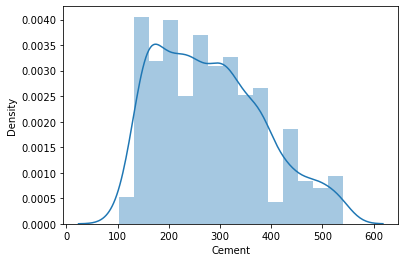

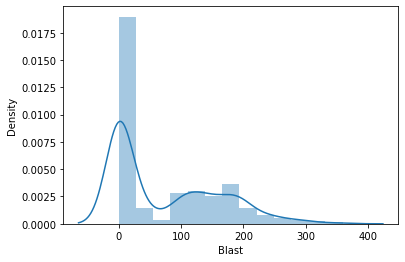

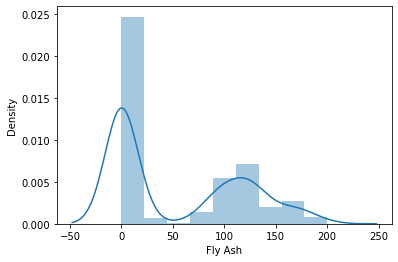

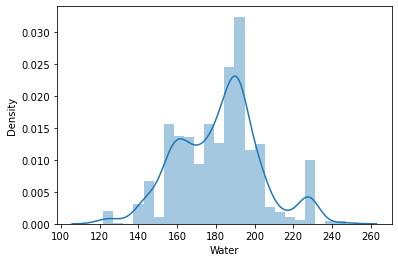

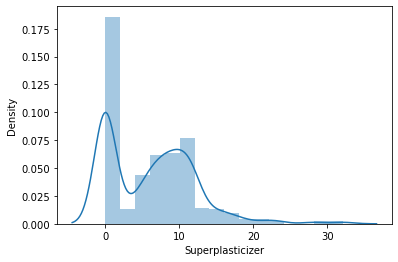

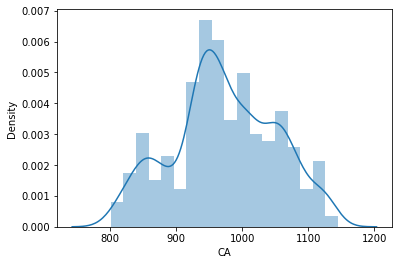

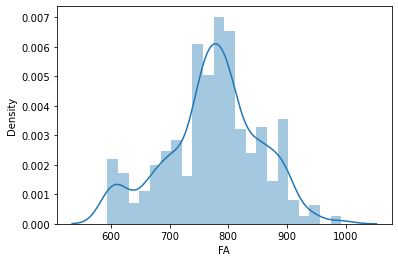

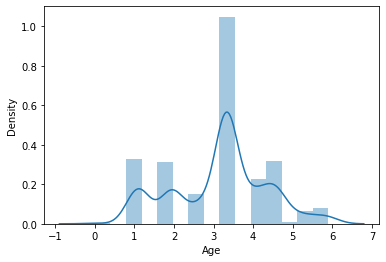

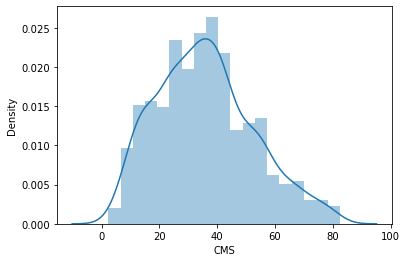

In [14]:
sns.distplot(data['Age'])
for i in data.columns:
    plt.figure()
    sns.distplot(data[i])

In [15]:
#handling missing values

In [16]:
from sklearn.impute import SimpleImputer

In [17]:
imp=SimpleImputer(missing_values=0,strategy='mean')
imp=imp.fit(data)
dst=imp.transform(data.values)

In [18]:
dst=pd.DataFrame(dst)
dst

,0,1,2,3,4,5,6,7,8
0,540.0,136.158676,120.288793,162.0,2.500000,1040.0,676.0,3.332205,79.99
1,540.0,136.158676,120.288793,162.0,2.500000,1055.0,676.0,3.332205,61.89
2,332.5,142.500000,120.288793,228.0,9.816897,932.0,594.0,5.598422,40.27
3,332.5,142.500000,120.288793,228.0,9.816897,932.0,594.0,5.899897,41.05
4,198.6,132.400000,120.288793,192.0,9.816897,978.4,825.5,5.886104,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.000000,90.300000,179.6,8.900000,870.1,768.3,3.332205,44.28
1026,322.2,136.158676,115.600000,196.0,10.400000,817.9,813.4,3.332205,31.18
1027,148.5,139.400000,108.600000,192.7,6.100000,892.4,780.0,3.332205,23.70
1028,159.1,186.700000,120.288793,175.6,11.300000,989.6,788.9,3.332205,32.77


In [41]:
from scipy.stats import zscore

In [42]:
zscr=np.abs(zscore(dst))
threshold=3
print(np.where(zscr>3))

(array([  74,   76,   79,   90,   97,   99,  102,  113,  120,  122,  125,
        136,  143,  145,  148,  159,  166,  168,  171,  181,  229,  230,
        231,  232,  233,  234,  235,  236,  237,  238,  354,  355,  356,
        357,  358,  391,  553,  559,  563,  571,  583,  584,  645,  698,
        699,  720,  834,  859,  873,  890,  928,  929,  931,  933,  934,
        936,  953,  991, 1016], dtype=int64), array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 4, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 4, 2], dtype=int64))


In [43]:
zscr[1016][2]

3.5349097378256293

In [45]:
dstnew=dst[(zscr<3).all(axis=1)]

In [46]:
print(dst.shape,dstnew.shape)

(1030, 9) (971, 9)


In [47]:
dst=dstnew
dst.shape

(971, 9)

In [48]:
x=dst.iloc[:,0:8]
x

,0,1,2,3,4,5,6,7
0,540.0,136.158676,120.288793,162.0,2.500000,1040.0,676.0,3.332205
1,540.0,136.158676,120.288793,162.0,2.500000,1055.0,676.0,3.332205
2,332.5,142.500000,120.288793,228.0,9.816897,932.0,594.0,5.598422
3,332.5,142.500000,120.288793,228.0,9.816897,932.0,594.0,5.899897
4,198.6,132.400000,120.288793,192.0,9.816897,978.4,825.5,5.886104
...,...,...,...,...,...,...,...,...
1025,276.4,116.000000,90.300000,179.6,8.900000,870.1,768.3,3.332205
1026,322.2,136.158676,115.600000,196.0,10.400000,817.9,813.4,3.332205
1027,148.5,139.400000,108.600000,192.7,6.100000,892.4,780.0,3.332205
1028,159.1,186.700000,120.288793,175.6,11.300000,989.6,788.9,3.332205


In [50]:
y=dst.iloc[:,-1]
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: 8, dtype: float64

In [51]:
x.shape

(971, 8)

In [52]:
y.shape

(971,)

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [54]:
x_train.shape

(757, 8)

In [55]:
y_train.shape

(757,)

In [56]:
x_test.shape

(214, 8)

In [57]:
y_test.shape

(214,)

In [58]:
lm=LinearRegression()

In [59]:
lm.fit(x_train,y_train)

LinearRegression()

In [60]:
lm.score(x_train,y_train)

0.7846368358031746

In [61]:
lm.coef_

array([ 0.06189984,  0.04267481, -0.03869602, -0.47574267, -0.41543375,
       -0.06897338, -0.066946  ,  8.20700798])

In [62]:
lm.intercept_

200.55969350812362

In [63]:
pred=lm.predict(x_test)
print(pred,y_test)

[37.29473353 36.22391047 32.22867838 36.49194065 30.9918634  13.95118985
 39.67563896 30.34302137 42.82305482 40.62578235 35.85479772 30.9561269
 64.41014548 47.02266917 41.45885184 20.97912158 51.78552263 12.78772609
 28.18313907 37.66275499 44.67769585 45.82962682 35.64534029 34.27479555
 62.00331391 44.70173336 34.44624296 31.47531906 33.3185735  52.11631314
 23.81579751 10.25502192 41.33400473 60.64465855 28.17016002 30.7634755
 60.32348678  8.27123995 47.73197985 31.76351107 11.58958325 29.20523007
 21.94124461 54.63482234 43.04266235 40.38772662 46.76340437 31.48755125
 45.8831771  31.66997626 45.07373041 36.78049997 40.59321044 42.23031442
 34.47666851 34.19104428 32.89299334 59.21057517  8.33667683 41.18338429
 45.3798212  50.20940174 27.07553203 40.1349074  25.22774131 23.0924447
 41.52851054 52.60088736 40.18336421 39.47130028 40.03586827 36.53146017
 46.60058818 31.04323748 52.8118656  10.54844419 49.34889361 38.12372329
 29.89143279 11.47429966 24.0292339   5.89261082 37.94

In [64]:
from sklearn.metrics import mean_squared_error,r2_score

In [65]:
print(mean_squared_error(y_test,pred))

58.358454273352685


In [66]:
r2_score(y_test,pred)

0.766212733306975

In [36]:
def predicttest(testvalue):
    testvalue=testvalue.reshape(1,-1)
    t=lm.predict(testvalue)
    print(t)

In [68]:
testv=np.array([540.0,136.158,120.288,162.00,2.500,1040.00,676.00,28.00])

In [69]:
predicttest(testv)

[269.84097805]


In [70]:
import joblib

In [71]:
joblib.dump(lm,'lmconcrete.obj')

['lmconcrete.obj']

In [72]:
lmfile=joblib.load('lmconcrete.obj')
lmfile.predict(x_train)

array([51.91743818, 43.25749345, 26.53910214, 26.45206349, 18.11828268,
       58.65162082, 26.61664028, 32.4806512 ,  7.79770476, 33.32131526,
       44.14773669, -1.06116948, 51.10221663, 42.95185555, 50.69558859,
       29.87327217, 31.08670653, 29.51611701, 22.59624659, 18.51410391,
       38.55679342, 32.66405643, 49.4991702 , 34.62863451, 32.61008731,
       22.36920157, 61.93729971, 39.63841024, 39.26675518, 60.75200597,
       16.79283114, 16.77913483, 54.73691452, 12.68050319, 61.12200622,
       34.18796967, 30.49135732, 11.65021355, 50.08297726, 23.18414604,
       10.13947069, 31.44572594, 30.73614483,  6.18924211, 36.10739345,
       28.64955318,  6.74095379, 45.21252809, 14.485941  , 26.24609687,
       26.33326051, 60.1094314 , 49.00403288, 76.07305176, 39.27111506,
       45.8458379 , 19.3316458 , 58.51635157, 19.78957275, 33.62902225,
       23.85335688, 28.83094916, 24.03351695, 40.49961139, 34.23176271,
       64.62922507, 40.28138146, 40.17375873, 62.91817682, 22.89